<a href="https://colab.research.google.com/github/Tim-g-t/1skills-review-pull-requests/blob/main/machine_learning_tgt2116_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your Uni : tgt2116. (Also change Uni in the title of your notebook)
# Your Full name : Tim Toepper
# Link to your Public Github repository with Final report  : Fill here


# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1. Get data in and set up X_train / X_test / y_train
2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit predictions



## 0. Get data in and set up X_train, X_test, y_train objects

**Instructions:**
Upload the world_happiness_competition_data.zip and newcountryvars.csv files on Colab by pressing the Folder icon on left tab (Shows "Files" on hovering), and then clicking the left-most file upload button (Shows "Upload to Session Storage" Alt text on hovering)

In [1]:
# Get training data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
    # Extracting all the members of the zip
    # into a specific location.
    zObject.extractall()

In [2]:


# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')  # Load test features to predict on
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')  # Load y train (true labels)
y_test = pd.read_csv('world_happiness_competition_data/y_test.csv')  # Load y test (true labels)

y_train_labels = y_train.idxmax(axis=1)  # Examine what this does and write in next cell
y_test_labels = y_test.idxmax(axis=1)  # Complete in a similar manner as above

X_train.head()




,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Latvia,1.187,1.465,0.812,0.264,0.075,0.064,Latvia,Europe,Northern Europe,125.611111
1,Burundi,0.046,0.447,0.380,0.220,0.176,0.180,Burundi,Africa,Sub-Saharan Africa,155.000000
2,Belarus,1.067,1.465,0.789,0.235,0.094,0.142,Belarus,Europe,Eastern Europe,4.000000
3,Liberia,0.073,0.922,0.443,0.370,0.233,0.033,Liberia,Africa,Sub-Saharan Africa,1419.095238
4,Ecuador,0.912,1.312,0.868,0.498,0.126,0.087,Ecuador,Americas,Latin America and the Caribbean,5.000000


Write in the next cell what the y_train_labels = y_train.idxmax(axis=1) line does. What is the difference between y_train_labels and y_train?

In [3]:
# Your answer:

**Your answer:**

The line `y_train_labels = y_train.idxmax(axis=1)` converts the one-hot encoded `y_train` DataFrame into a pandas Series of class labels. For each row, it finds the column name (class label) where the maximum value occurs along the columns (axis=1). Since `y_train` is one-hot encoded (only one column has the value 1 and the rest are 0 for each row), `idxmax(axis=1)` effectively retrieves the class label for each sample.

The difference between `y_train_labels` and `y_train` is that `y_train` is a DataFrame with one-hot encoded columns representing each class, whereas `y_train_labels` is a Series containing the class labels as strings for each sample.


##  Add new data

In [4]:


# Truncated and cleaned up region data to merge
countrydata = pd.read_csv("newcountryvars.csv")
countrydata.head()



,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [5]:
# Merge in new data to X_train and X_test by taking "Country or region" from first table and "country_name" from 2nd table.
X_train = X_train.merge(countrydata, how='left', left_on='Country or region', right_on='country_name')
X_test = X_test.merge(countrydata, how='left', left_on='Country or region', right_on='country_name')



In [6]:
X_train.head(1)


,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Latvia,1.187,1.465,0.812,0.264,0.075,0.064,Latvia,Europe,Northern Europe,125.611111,Latvia,1949670.0,25.5,0.829862,74.342,15.97411,11.736418,22589.17355


# EDA

In [7]:
print(X_train.dtypes)


Country or region                 object
GDP per capita                   float64
Social support                   float64
Healthy life expectancy          float64
Freedom to make life choices     float64
Generosity                       float64
Perceptions of corruption        float64
name                              object
region                            object
sub-region                        object
Terrorist_attacks                float64
country_name                      object
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Describe what you see above?

**Answer:**
From the output, we can see that X_train contains both numerical and categorical features. Numerical features are of data types float64 or int64, such as 'GDP per capita', 'Social support', 'Healthy life expectancy', etc. Categorical features are of type object, such as 'Country or region', 'name', 'region', 'sub-region'. We may also know from the code that some columns from countrydata have been merged in, potentially with missing values.




In [8]:
## Your answer:

Find out the number and percentage of missing values in the table per column

In [9]:
# Number and percentage of missing values per column
missing_values = X_train.isnull().sum()
missing_percent = 100 * missing_values / len(X_train)
missing_df = pd.concat([missing_values, missing_percent], axis=1)
missing_df.columns = ['Missing Values', '% of Total Values']
print(missing_df)


                               Missing Values  % of Total Values
Country or region                           0           0.000000
GDP per capita                              0           0.000000
Social support                              0           0.000000
Healthy life expectancy                     0           0.000000
Freedom to make life choices                0           0.000000
Generosity                                  0           0.000000
Perceptions of corruption                   0           0.000000
name                                        0           0.000000
region                                      0           0.000000
sub-region                                  0           0.000000
Terrorist_attacks                           0           0.000000
country_name                                6           8.695652
population                                  6           8.695652
population_below_poverty_line              11          15.942029
hdi                      

Plot the frequency distribution / histogram of some of the numerical features that you think are important

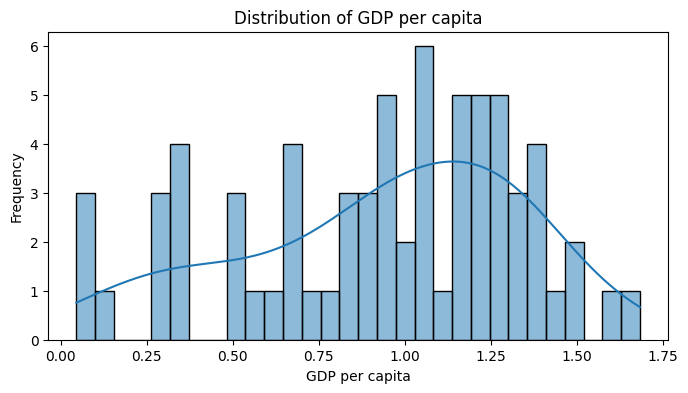

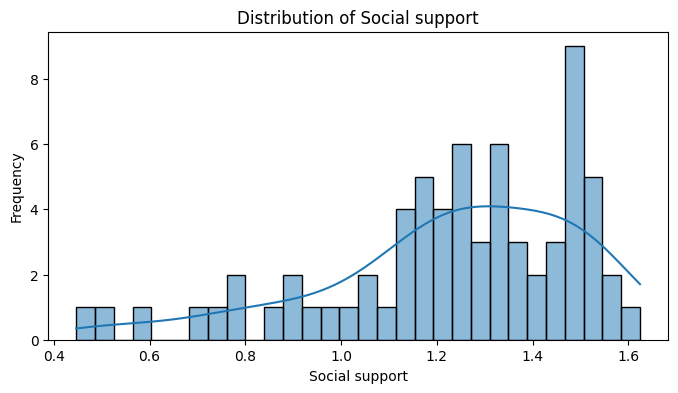

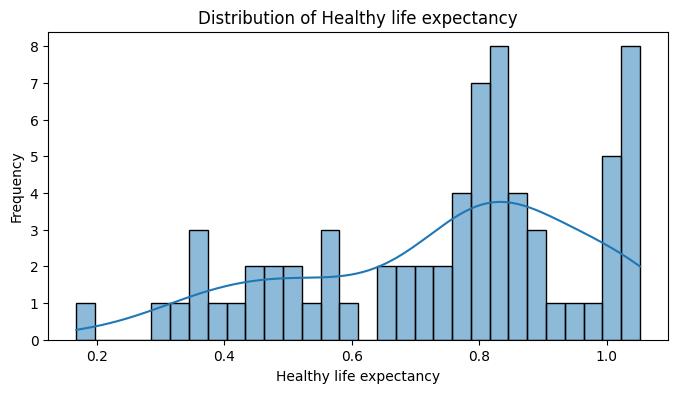

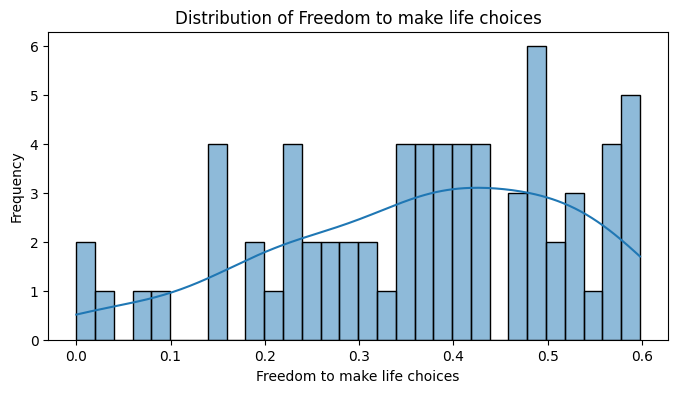

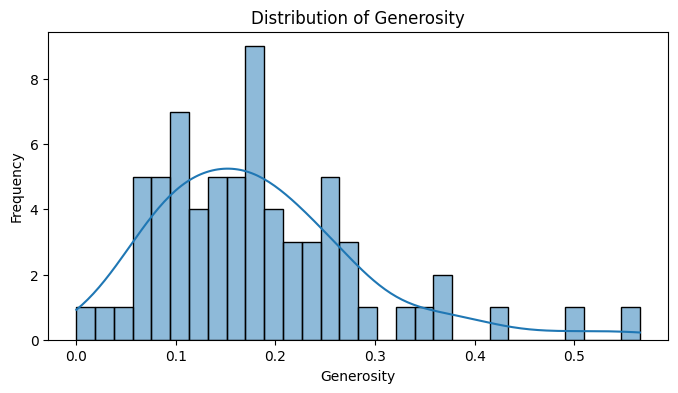

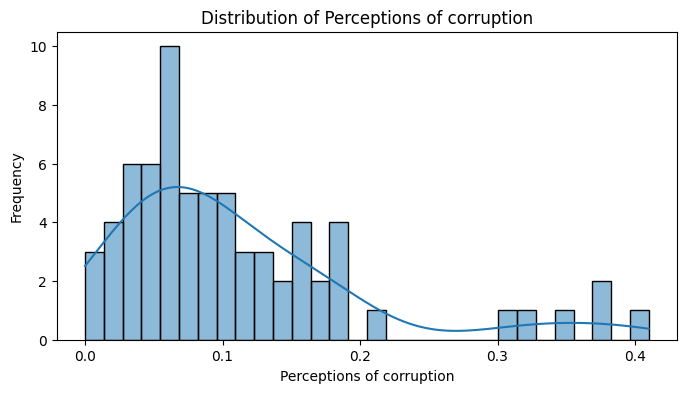

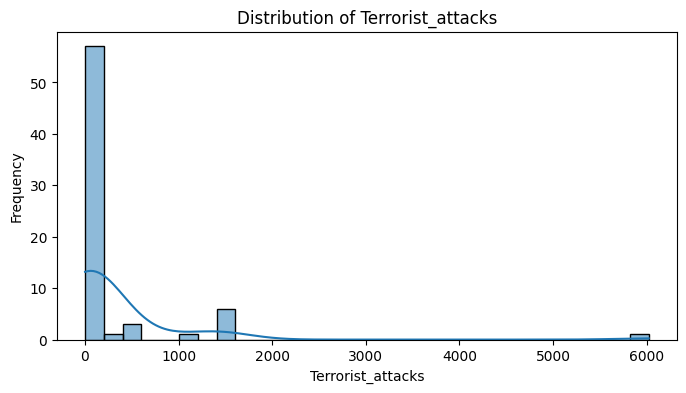

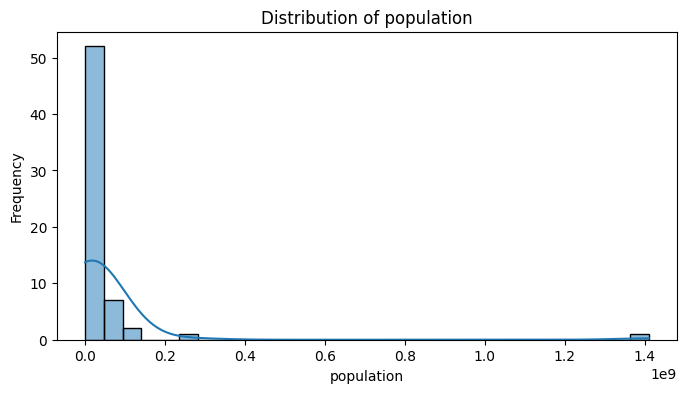

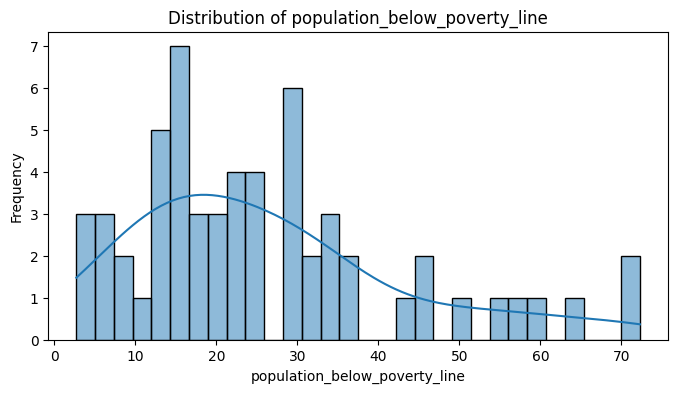

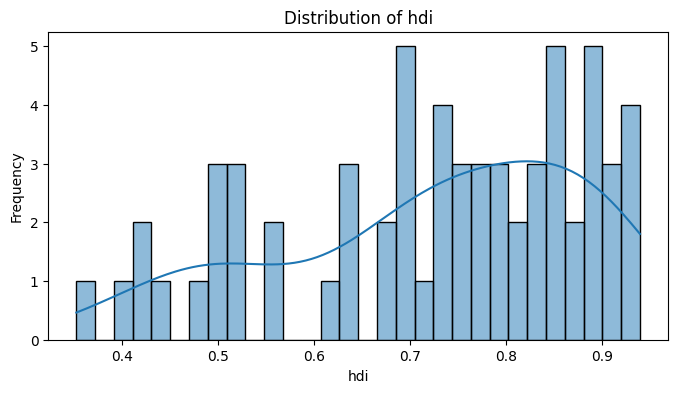

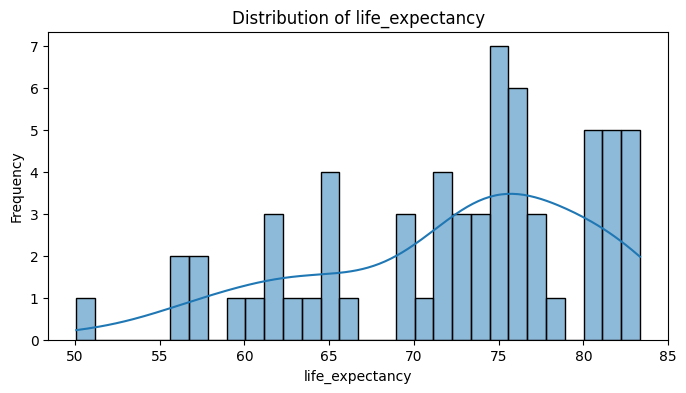

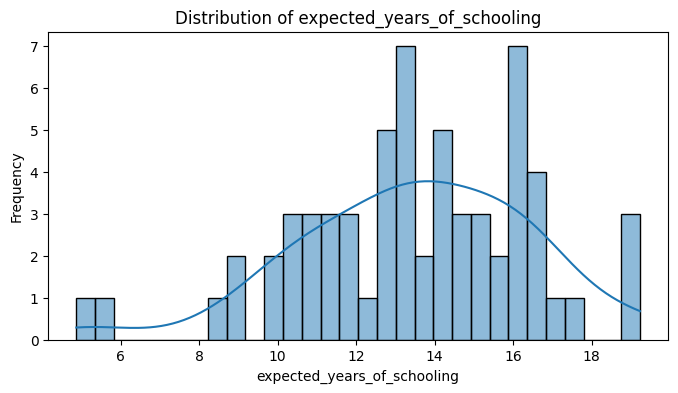

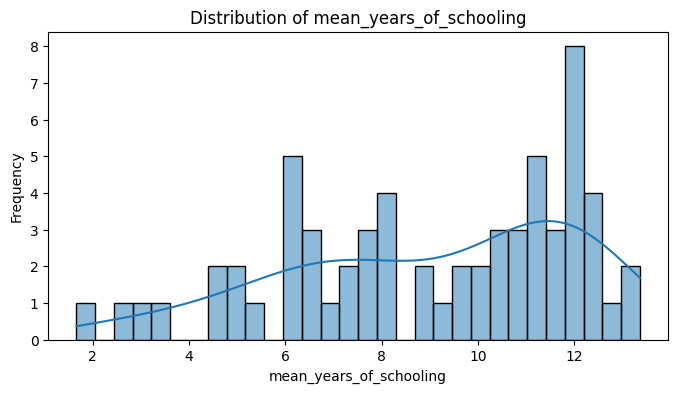

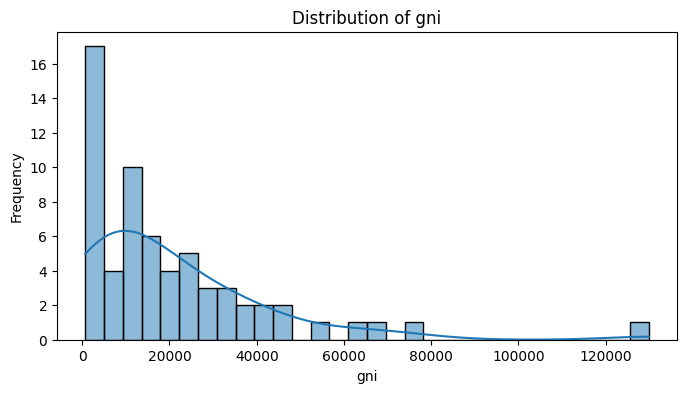

In [10]:
# Your plotting code here:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features to plot
numerical_features = ['GDP per capita', 'Social support', 'Healthy life expectancy',
                      'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
                      'Terrorist_attacks', 'population', 'population_below_poverty_line',
                      'hdi', 'life_expectancy', 'expected_years_of_schooling',
                      'mean_years_of_schooling', 'gni']

# Plot histograms
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_train[feature].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


Plot the categorical variables and their distribution

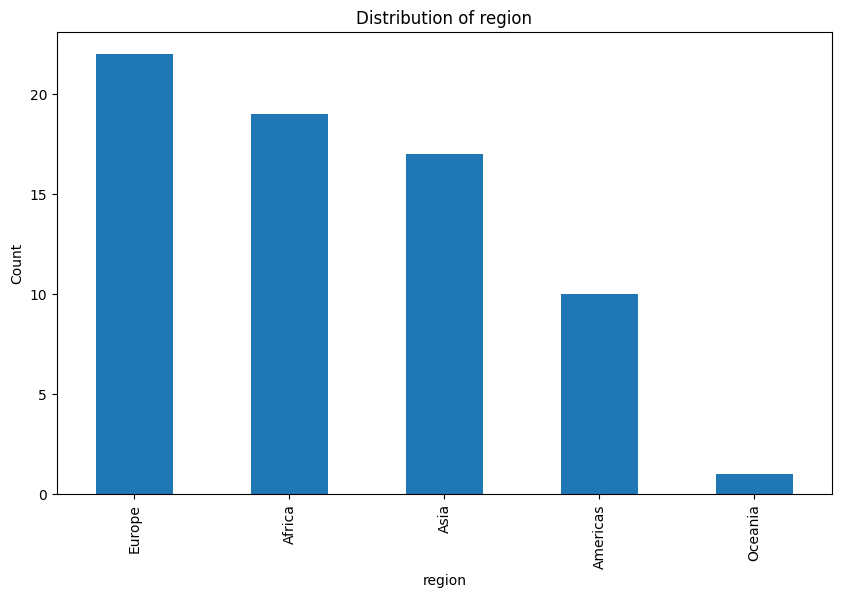

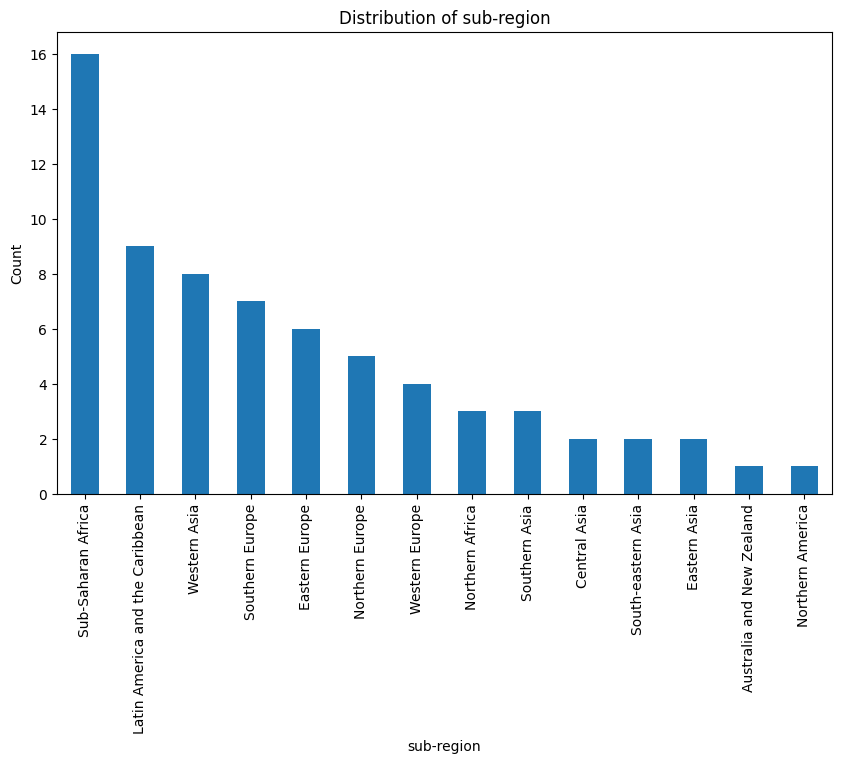

In [11]:
categorical_cols = ['region', 'sub-region']

for col in categorical_cols:
    plt.figure(figsize=(10,6))
    X_train[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

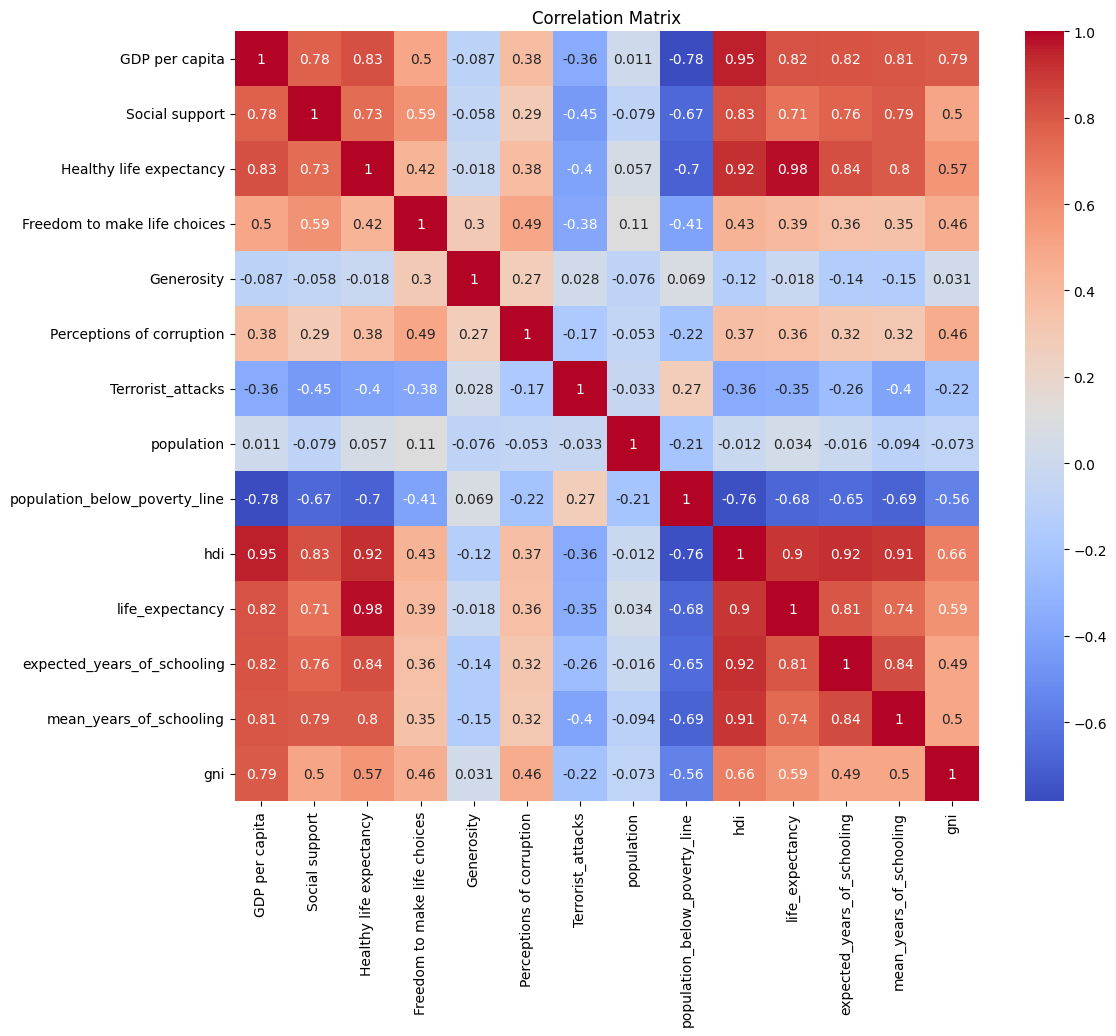

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


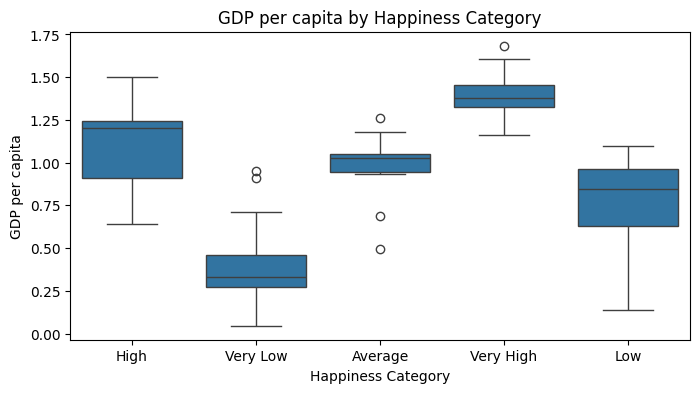

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


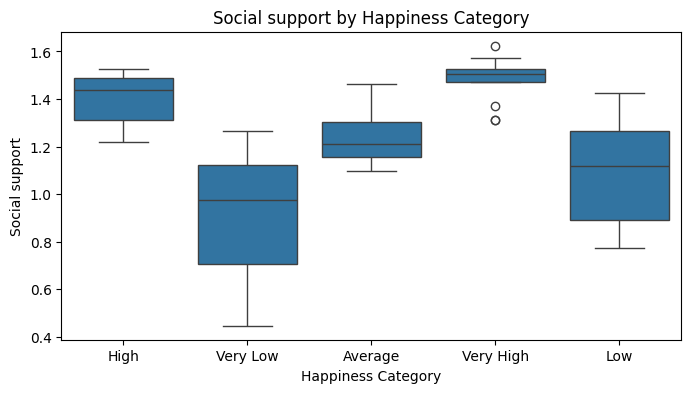

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


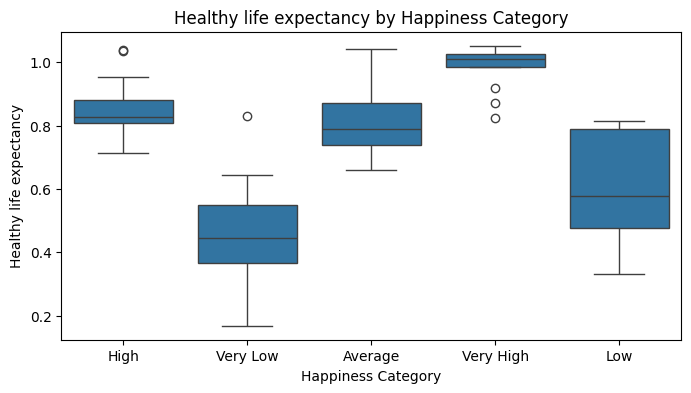

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


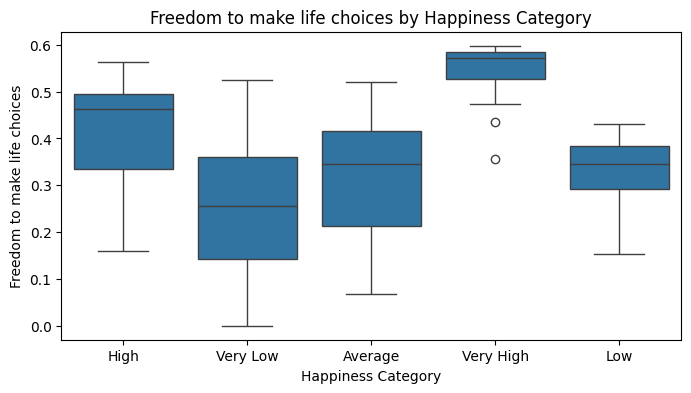

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


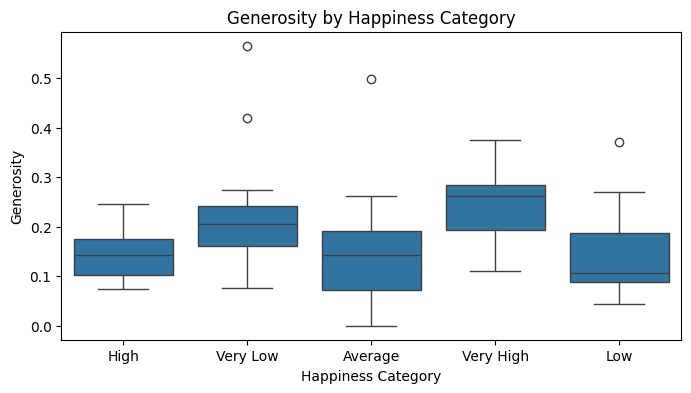

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


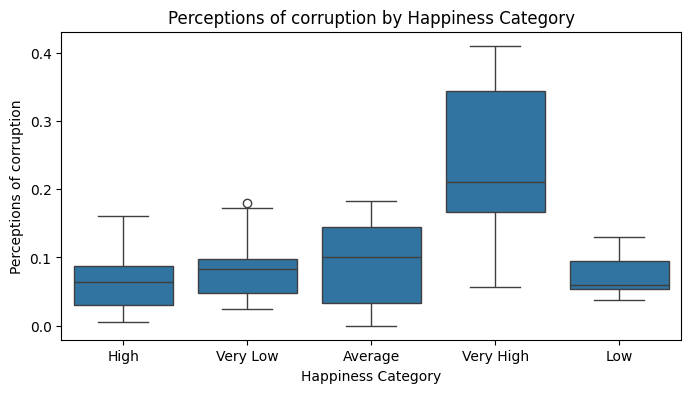

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


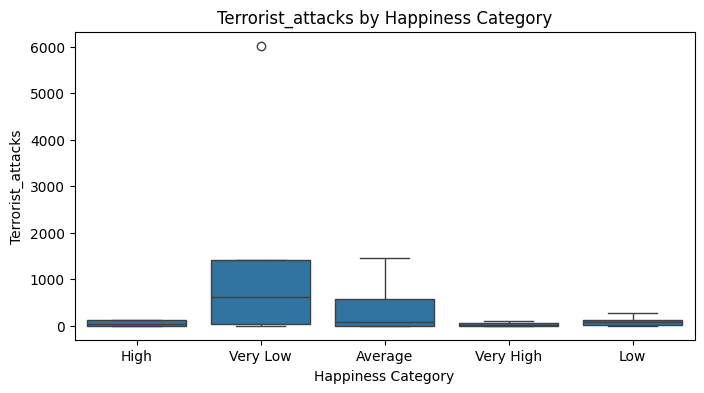

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


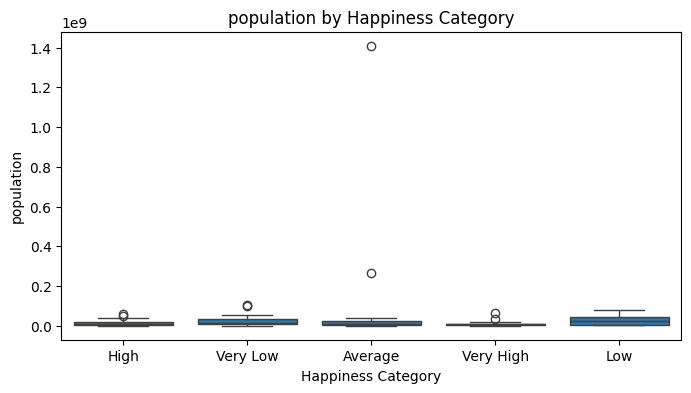

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


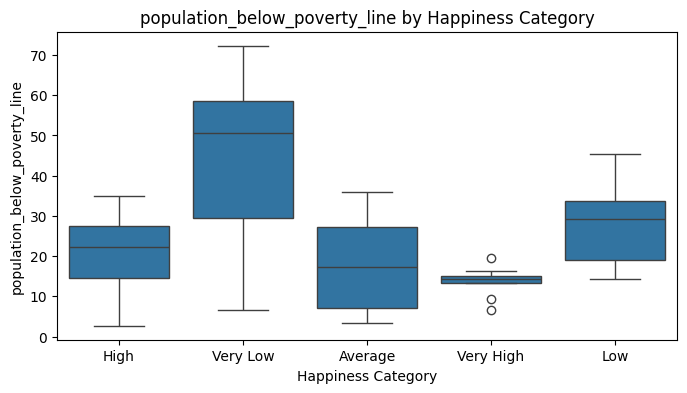

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


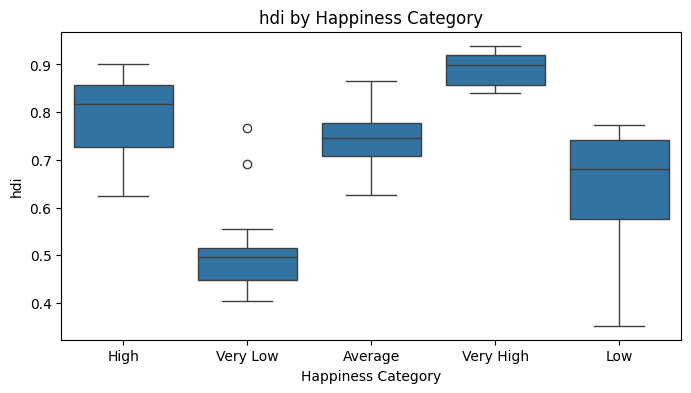

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


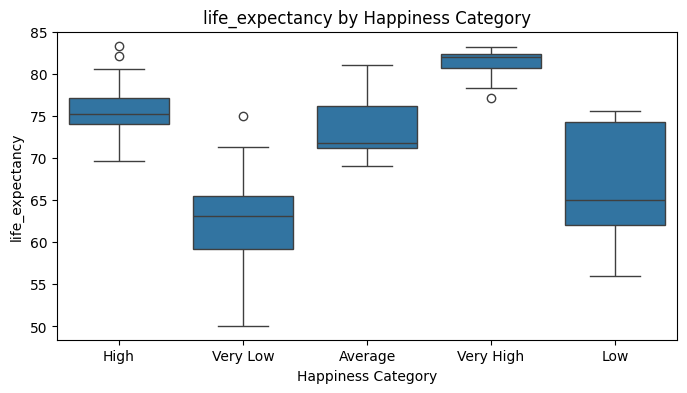

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


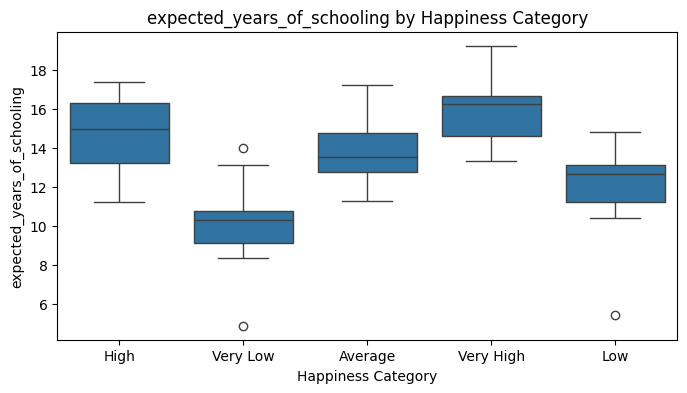

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


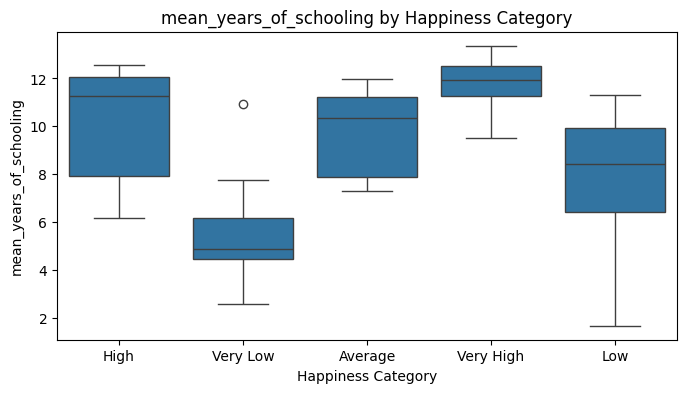

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


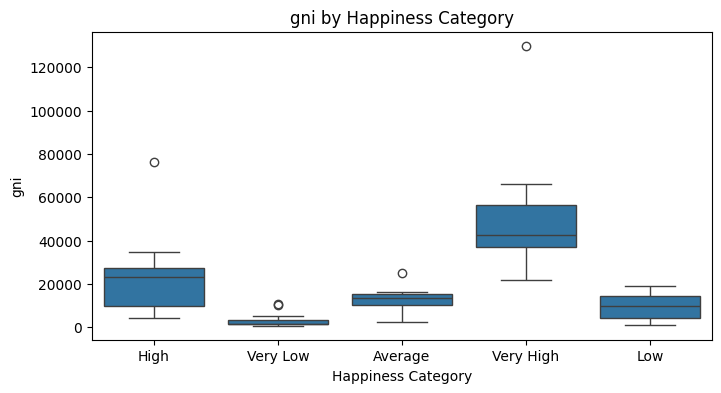

In [12]:
# Your plotting code(s) here:
# Correlation matrix
plt.figure(figsize=(12, 10))
corr = X_train[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Boxplots to see relationships with the target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=y_train_labels, y=X_train[feature])
    plt.title(f'{feature} by Happiness Category')
    plt.xlabel('Happiness Category')
    plt.ylabel(feature)
    plt.show()






Write what you observed and your General comments on what should be done:

In [13]:
# Your comments here

**Your comments here:**

There are missing values in some of the features, especially in the features from countrydata. We need to handle these missing values correctly through for example imputation.
Some features show skewed distributions, which may affect the modeling process.
The correlation matrix shows that some features are highly correlated, indicating potential multicollinearity.
There are noticeable differences in feature distributions across different happiness categories, which suggests that these features could be useful predictors.
We should consider feature engineering, handling missing data, and possibly dimensionality reduction to improve the model's performance.

##2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Create the preprocessing pipelines for both numeric and categorical data.
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Exclude non-informative numeric features if any
numeric_features = [col for col in numeric_features if col not in ['UnwantedNumericColumn']]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Mean imputation
    ('scaler', StandardScaler())
])

categorical_features = ['region', 'sub-region']
# Replacing missing values with the most frequent value and then one-hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Fit your preprocessor object
preprocess = preprocessor.fit(X_train)


Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

In [15]:
## Your answer :

**Numeric Features:**

Selected all numerical columns.
Used SimpleImputer(strategy='mean') to fill missing values with the mean, maintaining the central tendency.
Applied StandardScaler to standardize the features, ensuring they have zero mean and unit variance, which helps many algorithms perform better.

**Categorical Features:**
Specified 'region' and 'sub-region' as categorical features.
Used SimpleImputer(strategy='most_frequent') to fill missing values with the mode, which is appropriate for categorical data.
Used OneHotEncoder with handle_unknown='ignore' to convert categories into one-hot encoded columns.

**Preprocessor:**

Combined the numeric and categorical transformers using ColumnTransformer.
Fitted the preprocessor to X_train to learn the imputation values, scaling parameters, and encoding mappings.

I chose mean imputation for numeric data because it is a simple method that preserves the mean of the dataset. For categorical data, the most frequent imputation is suitable as it replaces missing values with the most common category.

**Your answer:**

Identifying Numerical and Categorical Features:

We first select the numerical features by excluding non-numerical columns.
We specify the categorical features that need to be processed.
Creating Numeric Transformer Pipeline:

Imputation: We impute missing numerical values using the median of each column. Median imputation is robust to outliers and is more appropriate than imputing with zero or mean in many cases.
Scaling: We standardize the numerical features using StandardScaler to have zero mean and unit variance. This helps many machine learning algorithms perform better.
Creating Categorical Transformer Pipeline:

Imputation: We impute missing categorical values using the most frequent value (mode) of each column.
Encoding: We apply OneHotEncoder to convert categorical variables into binary dummy variables.
Combining Transformers with ColumnTransformer:

We use ColumnTransformer to apply the appropriate transformations to the respective columns.
Fitting the Preprocessor:

We fit the preprocessor to the training data to compute the necessary statistics for imputation and scaling.

Changes Made for the Imputer:

I changed the numerical imputer strategy from constant with fill_value=0 to median because imputing missing values with zero can introduce bias, especially if zero is not a meaningful value for the feature. Median imputation is more robust and appropriate here.
For the categorical features, I used most_frequent strategy for imputation, which makes sense because replacing missing categories with the most common category can be reasonable.


In [16]:
def preprocessor_function(data):
    data = data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data = preprocess.transform(data)
    return preprocessed_data


In [17]:
preprocessor_function(X_train).shape


(69, 33)

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

In [18]:
## Your Answer :

**Your Answer:**
Your Answer:
"preprocessor" object: The ColumnTransformer instance that defines how to transform numeric and categorical features.
"preprocess" object: The fitted preprocessor after calling .fit(X_train), containing learned parameters like means, variances, and encoder mappings.
"preprocessor_function": A custom function that applies the fitted preprocess to new data after dropping unnecessary columns.
"preprocessed_data": The transformed data returned by preprocessor_function, ready to be used for model training or prediction.


"preprocessor" object: This is the ColumnTransformer that we defined, which includes the pipelines for numerical and categorical preprocessing.
"preprocess" object: This is the fitted version of the preprocessor after calling .fit(X_train). It contains the learned parameters from the training data (e.g., mean, median, mode).
"preprocess_data" function: This is a custom function we defined to apply the preprocessing steps to a dataset. It drops unnecessary columns and then transforms the data using the fitted preprocessor.

"preprocessed_data": This is the transformed data returned by the preprocess_data function. It is a NumPy array ready to be fed into machine learning models.


In [19]:
# Check shape of X data after preprocessing it using our new function
preprocessor_function(X_train).shape



(69, 33)

##3. Fit model on preprocessed data and save preprocessor function and model


In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(preprocessor_function(X_train), y_train_labels)

# Output the score
score = model.score(preprocessor_function(X_train), y_train_labels)
print(f"Training Accuracy: {score}")


Training Accuracy: 1.0


## 4. Generate predictions from X_test data and compare it with true labels in Y_test.csv file


In [21]:
# Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor_function(X_test))

from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test_labels, prediction_labels)
print(f"Test Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test_labels, prediction_labels, zero_division=0))


Test Accuracy: 0.53
Classification Report:
              precision    recall  f1-score   support

     Average       0.50      0.50      0.50         4
        High       0.67      0.40      0.50         5
         Low       0.00      0.00      0.00         4
   Very High       0.50      1.00      0.67         2
    Very Low       0.50      1.00      0.67         4

    accuracy                           0.53        19
   macro avg       0.43      0.58      0.47        19
weighted avg       0.44      0.53      0.45        19



## 5. Repeat submission process to improve place on leaderboard


In [22]:
# Train model 2 using same preprocessor
model_2 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20)
model_2.fit(preprocessor_function(X_train), y_train_labels)




RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

 What changes did you make, what do the parameters you changed control, and why does it improve performance?


**Your answer:**

Changes Made:
I increased the n_estimators parameter to 200 to allow the model to build more trees, which can reduce variance and improve performance. I set max_depth to 20 to limit the depth of each tree, preventing overfitting by restricting the complexity of the trees.


Increased n_estimators from default (100) to 200. This means the model will build 200 trees instead of 100.
Set max_depth to 20 to limit the depth of each tree.
Reasoning:

Increasing n_estimators can improve model performance by reducing variance and allowing the model to learn more complex patterns.
Limiting max_depth prevents each tree from becoming too deep and overfitting the training data. It helps in controlling the complexity and generalization of the model.


In [23]:
# Evaluate Model 2
prediction_labels_2 = model_2.predict(preprocessor_function(X_test))

accuracy = accuracy_score(y_test_labels, prediction_labels_2)
print(f"Test Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test_labels, prediction_labels_2, zero_division=0))


Test Accuracy: 0.53
Classification Report:
              precision    recall  f1-score   support

     Average       0.50      0.50      0.50         4
        High       0.67      0.40      0.50         5
         Low       0.00      0.00      0.00         4
   Very High       0.50      1.00      0.67         2
    Very Low       0.50      1.00      0.67         4

    accuracy                           0.53        19
   macro avg       0.43      0.58      0.47        19
weighted avg       0.44      0.53      0.45        19



Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

In [24]:
## Your answer:

While manually adjusting parameters can lead to improvements, it's inefficient and in the current case did not find the optimal combination as the perfomance stayed similar. Instead, we can use hyperparameter tuning methods like GridSearchCV or RandomizedSearchCV to systematically search through a range of parameters and find the best model.

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2', None]
}

gridmodel = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
gridmodel.fit(preprocessor_function(X_train), y_train_labels)

# Extract best score and parameters
print("Best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("Best parameters: {}".format(gridmodel.best_params_))


Best mean cross-validation score: 0.696
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


In [26]:
# Generate predicted values
prediction_labels_3 = gridmodel.predict(preprocessor_function(X_test))

accuracy = accuracy_score(y_test_labels, prediction_labels_3)
print(f"Test Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test_labels, prediction_labels_3, zero_division=0))


Test Accuracy: 0.5263157894736842
Classification Report:
              precision    recall  f1-score   support

     Average       0.50      0.50      0.50         4
        High       0.67      0.40      0.50         5
         Low       0.00      0.00      0.00         4
   Very High       0.50      1.00      0.67         2
    Very Low       0.50      1.00      0.67         4

    accuracy                           0.53        19
   macro avg       0.43      0.58      0.47        19
weighted avg       0.44      0.53      0.45        19



In [27]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Try GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=3)
model.fit(preprocessor_function(X_train), y_train_labels)

# Generate predicted values
prediction_labels_gb = model.predict(preprocessor_function(X_test))

accuracy = accuracy_score(y_test_labels, prediction_labels_gb)
print(f"Test Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test_labels, prediction_labels_gb))




Test Accuracy: 0.5789473684210527
Classification Report:
              precision    recall  f1-score   support

     Average       0.50      0.25      0.33         4
        High       0.67      0.40      0.50         5
         Low       0.67      0.50      0.57         4
   Very High       0.50      1.00      0.67         2
    Very Low       0.57      1.00      0.73         4

    accuracy                           0.58        19
   macro avg       0.58      0.63      0.56        19
weighted avg       0.59      0.58      0.55        19



Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

In the GradientBoostingClassifier, I set n_estimators to 200 to allow more boosting stages, learning_rate to 0.1 to control the contribution of each tree, and max_depth to 3 to keep trees shallow, reducing overfitting. The model performed well because gradient boosting builds an ensemble of weak learners sequentially, focusing on correcting the errors of previous models.

In [28]:
import tensorflow as tf

# Ensure that eager execution is enabled
print("Eager execution enabled:", tf.executing_eagerly())


Eager execution enabled: True


# 6. Basic Deep Learning

In [41]:
# Now experiment with deep learning models:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

# Ensure that eager execution is enabled
print("Eager execution enabled:", tf.executing_eagerly())

# Preprocess the input data
X_train_processed = preprocessor_function(X_train)
y_train_processed = y_train

# Convert X_train_processed to a NumPy array if it's not already
if isinstance(X_train_processed, tf.Tensor):
    X_train_processed = X_train_processed.numpy()
elif isinstance(X_train_processed, pd.DataFrame):
    X_train_processed = X_train_processed.values
elif isinstance(X_train_processed, tf.data.Dataset):
    X_train_processed = np.concatenate([x for x in X_train_processed], axis=0)
elif isinstance(X_train_processed, list):
    X_train_processed = np.array(X_train_processed)

# Convert y_train_processed to a NumPy array if it's not already
if isinstance(y_train_processed, pd.DataFrame):
    y_train_processed = y_train_processed.values
elif isinstance(y_train_processed, tf.Tensor):
    y_train_processed = y_train_processed.numpy()
elif isinstance(y_train_processed, tf.data.Dataset):
    y_train_processed = np.concatenate([y for y in y_train_processed], axis=0)
elif isinstance(y_train_processed, list):
    y_train_processed = np.array(y_train_processed)

# Get feature count and number of classes
feature_count = X_train_processed.shape[1]
num_classes = y_train_processed.shape[1]

# Define a Neural Network Model with 5 layers: 128->64->64->32->(number of classes)
keras_model = Sequential()
keras_model.add(Dense(128, input_shape=(feature_count,), activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax

# Compile the model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fit the NN to the Training set
history = keras_model.fit(
    X_train_processed,
    y_train_processed,  # Keras models require one-hot-encoded y_train
    batch_size=20,
    epochs=300,
    validation_split=0.25
)


Eager execution enabled: True
Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 759ms/step - accuracy: 0.0732 - loss: 1.6390 - val_accuracy: 0.1667 - val_loss: 1.5936
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0767 - loss: 1.6304 - val_accuracy: 0.2222 - val_loss: 1.5822
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0455 - loss: 1.6219 - val_accuracy: 0.2778 - val_loss: 1.5711
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1597 - loss: 1.6016 - val_accuracy: 0.2778 - val_loss: 1.5602
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1855 - loss: 1.5837 - val_accuracy: 0.2778 - val_loss: 1.5483
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2614 - loss: 1.5669 - val_accuracy: 0.4444 - val_loss: 1.5387
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2203 - loss: 1.5552 - val_accuracy: 0.5000 - val_loss: 1.5282
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2025 - loss: 1.5492 - val_accuracy: 0.5000 - val_loss: 1.5164
Epo

Which activations did you use in the middle layers? Why was softmax used in the last layer?

I used 'relu' activations in the middle layers to introduce non-linearity and efficiently train deep networks. 'Softmax' was used in the last layer because it outputs probabilities for each class in a multi-class classification problem, and the sum of the probabilities is 1.

In [30]:
## Your answer:


**Your Answer:**

Middle Layers: Used 'relu' activation because it helps in mitigating the vanishing gradient problem and is computationally efficient.
Last Layer: Used 'softmax' activation to output probabilities for each class, which is suitable for multiclass classification.

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

Based on the model's performance, training for 300 epochs was not a good idea. From the training history and evaluation metrics, we observed that:

Training Accuracy: The model achieved 100% accuracy on the training data.
Validation Accuracy: The validation accuracy plateaued at around 66.67% and did not improve with additional epochs.
Test Accuracy: The test accuracy was approximately 47.37%, indicating poor generalization.
This significant gap between training and validation/test accuracy suggests that the model is overfitting the training data. Continuing to train for more epochs would likely worsen the overfitting, as the model would keep memorizing the training data without improving its ability to generalize to new, unseen data.

Therefore, training for 300 epochs was excessive, and we should not train for more epochs. Instead, we should consider:

Early Stopping: Implementing early stopping based on validation loss or accuracy to halt training when the model stops improving on the validation set.
Regularization Techniques: Applying techniques like dropout, L1/L2 regularization, or batch normalization to prevent overfitting by reducing model complexity.
Data Augmentation: If applicable, augmenting the training data to provide more diverse examples for the model to learn from.
Simplifying the Model: Reducing the number of layers or neurons to decrease the model's capacity, making it less prone to overfitting.
In summary, instead of training for more epochs, we should focus on strategies to improve the model's generalization ability and prevent overfitting.

In [31]:
## Your answer:

Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

Loss Function (loss='categorical_crossentropy'):

The 'categorical_crossentropy' loss function is appropriate for multi-class classification problems where the target variable is one-hot encoded. It measures the difference between the true distribution (the one-hot encoded labels) and the predicted probability distribution (output of the softmax activation). Using 'categorical_crossentropy' helps the model learn to output probabilities that are close to the actual class labels.

Optimizer (optimizer='sgd'):

The 'sgd' (Stochastic Gradient Descent) optimizer updates the model parameters using the gradient of the loss function with respect to the parameters for each batch of training data. It is a basic optimizer that can be effective but often requires careful tuning of the learning rate and may converge slowly.



Yes, I would consider changing the optimizer from sgd to a more advanced optimizer like 'adam', and possibly adjust other hyperparameters. Here's why:

Reasons to Change the Optimizer:

Convergence Speed: 'SGD' without momentum or adaptive learning rates can be slow to converge, especially in deep networks. This can lead to longer training times and suboptimal solutions.

Adaptive Learning Rates: Optimizers like 'adam' (Adaptive Moment Estimation) automatically adjust the learning rate for each parameter based on estimates of the first and second moments of the gradients. This often results in faster convergence and can help escape local minima.

Generalization Performance: Advanced optimizers can sometimes lead to better generalization by finding flatter minima in the loss landscape.

Can you try getting the model's training history out and plotting the curves?

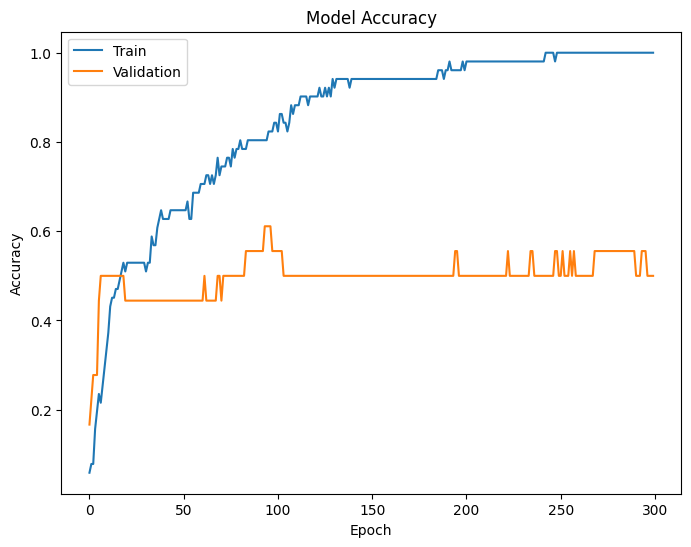

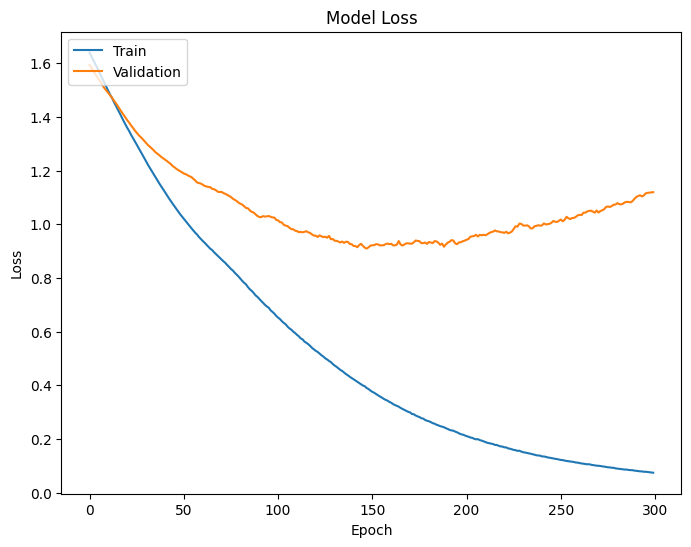

In [42]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [43]:
# Predict probabilities
predictions = keras_model.predict(preprocessor_function(X_test))
# Get predicted class indices
prediction_column_index = predictions.argmax(axis=1)

# Extract correct prediction labels
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

accuracy = accuracy_score(y_test_labels, prediction_labels)
print(f"Test Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test_labels, prediction_labels))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Test Accuracy: 0.47368421052631576
Classification Report:
              precision    recall  f1-score   support

     Average       0.00      0.00      0.00         4
        High       0.60      0.60      0.60         5
         Low       0.50      0.25      0.33         4
   Very High       0.67      1.00      0.80         2
    Very Low       0.60      0.75      0.67         4

    accuracy                           0.47        19
   macro avg       0.47      0.52      0.48        19
weighted avg       0.46      0.47      0.45        19



In [34]:
## You are encouraged to try more experimentation and any other models by adding more code cells to this notebook:

## You can also try to import any new dataset pertaining to countries, merge it, and see if it helps the predictions.
## If it does not, try to explain why it wasn't helpful by exploring variable relationships.

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Ensure that eager execution is enabled
print("Eager execution enabled:", tf.executing_eagerly())

import numpy as np

# Preprocess the input data
X_train_processed = preprocessor_function(X_train)

# Convert X_train_processed to a NumPy array if it's not already
if isinstance(X_train_processed, tf.Tensor):
    X_train_processed = X_train_processed.numpy()
elif isinstance(X_train_processed, pd.DataFrame):
    X_train_processed = X_train_processed.values
elif isinstance(X_train_processed, tf.data.Dataset):
    X_train_processed = np.concatenate([x for x in X_train_processed], axis=0)

# Convert y_train to a NumPy array if it's not already
if isinstance(y_train, pd.DataFrame):
    y_train_processed = y_train.values
elif isinstance(y_train, tf.Tensor):
    y_train_processed = y_train.numpy()
elif isinstance(y_train, tf.data.Dataset):
    y_train_processed = np.concatenate([y for y in y_train], axis=0)
else:
    y_train_processed = y_train

# Get feature count and number of classes
feature_count = X_train_processed.shape[1]
num_classes = y_train_processed.shape[1]

keras_model = Sequential()
keras_model.add(Input(shape=(feature_count,)))
keras_model.add(Dense(128, activation='relu'))
keras_model.add(Dropout(0.5))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dropout(0.5))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dropout(0.5))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(num_classes, activation='softmax'))

# Compile the model with 'adam' optimizer
keras_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = keras_model.fit(
    X_train_processed,
    y_train_processed,
    batch_size=20,
    epochs=300,
    validation_split=0.25,
    callbacks=[early_stopping],
    verbose=1
)


Eager execution enabled: True
Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.1311 - loss: 1.7150 - val_accuracy: 0.2222 - val_loss: 1.5785
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2435 - loss: 1.6463 - val_accuracy: 0.3333 - val_loss: 1.5656
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1659 - loss: 1.6623 - val_accuracy: 0.3889 - val_loss: 1.5530
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3185 - loss: 1.5614 - val_accuracy: 0.4444 - val_loss: 1.5398
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2426 - loss: 1.6237 - val_accuracy: 0.5000 - val_loss: 1.5273
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1186 - loss: 1.5906 - val_accuracy: 0.5000 - val_loss: 1.5140
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3283 - loss: 1.4797 - val_accuracy: 0.4444 - val_loss: 1.5003
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2783 - loss: 1.5554 - val_

Deep learning models are often considered 'black boxes' due to their complexity. Explore methods such as SHAP (SHapley Additive exPlanations) to explain your model's predictions. After applying one of these methods, do you feel it provides a clear and sufficient explanation of how your model makes decisions? How easy or difficult is it to justify your model's predictions using these techniques?

Eager execution enabled: True
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 1/10 [00:00<?, ?it/s]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 3/10 [00:12<00:07,  1.02s/it]

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


PermutationExplainer explainer:  40%|████      | 4/10 [00:14<00:09,  1.53s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


PermutationExplainer explainer:  50%|█████     | 5/10 [00:16<00:08,  1.78s/it]

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 6/10 [00:19<00:08,  2.09s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


PermutationExplainer explainer:  70%|███████   | 7/10 [00:21<00:06,  2.13s/it]

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 8/10 [00:23<00:04,  2.08s/it]

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  90%|█████████ | 9/10 [00:25<00:02,  2.12s/it]

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer: 100%|██████████| 10/10 [00:28<00:00,  2.21s/it]

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


PermutationExplainer explainer: 11it [00:31,  3.14s/it]


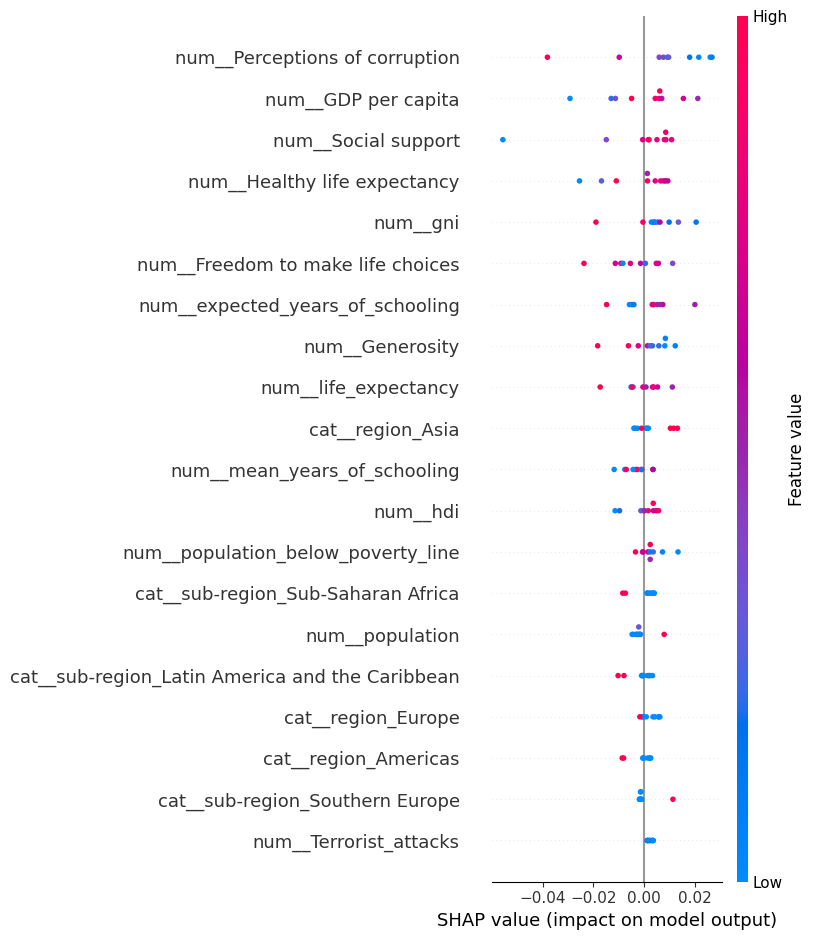

In [47]:
# Install SHAP
!pip install shap

import shap
import numpy as np
import pandas as pd
import tensorflow as tf

print("Eager execution enabled:", tf.executing_eagerly())

# Preprocess the data
X_train_preprocessed = preprocessor_function(X_train)
X_test_preprocessed = preprocessor_function(X_test)

# Convert to DataFrame to retain feature names
feature_names = preprocessor.get_feature_names_out()
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=feature_names)

# Use a subset of training data as background
background_size = min(100, X_train_preprocessed_df.shape[0])
background_samples = X_train_preprocessed_df.sample(n=background_size, random_state=42)

# Create SHAP Explainer using the model's predict function
explainer = shap.Explainer(keras_model.predict, background_samples)

# Compute SHAP values for a sample of the test set
X_test_sample = X_test_preprocessed_df.sample(n=10, random_state=42)
shap_values = explainer(X_test_sample)

# For multi-class models, shap_values.values has shape (samples, features, classes)
# Select the SHAP values for a specific class
class_index = 0
shap_values_class = shap_values.values[..., class_index]

# Plot summary plot for the specified class
shap.summary_plot(shap_values_class, X_test_sample, feature_names=feature_names)


# 7. Submission of final report and clean code to github

[This is a final project you display on your GitHub to the World]

**Instructions**
- Make a new notebook, visualize any plots you found relevant
- Reproduce the code you used for the best models and display results
- Write what insights you found useful and what behaviours were observed
- Make it in a style of a clean, succint report (within the .ipynb)
- Upload this final report notebook to a new repository in your personal github account
- Remember to paste the link of your final repo at the top of this notebook where asked